In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('D:/DataSet/PRD')
import sys
sys.path.append('D:/gitln/WorkCode/BaseFunc/')
df = pd.read_csv('total_amt.csv',encoding='gbk')
df['report_date'] = pd.to_datetime(df['report_date'],format='%Y/%m/%d')
df.set_index('report_date', inplace=True)

In [11]:
train = df.loc['2014-04':,:].copy()

In [12]:
mean = train.groupby(train.index.month).mean()

In [13]:
mean.columns=['purchase_mean', 'redeem_mean']
train['month'] = train.index.month

In [16]:
train1 = train.merge(mean, left_on='month',right_index=True)

In [20]:
train1['purchase_ratio'] = train1['total_purchase_amt']/train1[
    'purchase_mean']
train1['redeem_ratio'] = train1['total_redeem_amt']/train1[
    'redeem_mean']

In [22]:
train2 = train1.loc[:,['purchase_ratio', 'redeem_ratio']].copy()

In [25]:
import statsmodels.api as sm

In [149]:
train2['logpur'] = np.log(train2['purchase_ratio'])
train2['logred'] = np.log(train2['redeem_ratio'])
train2['weekday'] = train2.index.weekday
model = sm.tsa.STL(train2['logpur'],robust=True).fit()

In [86]:
season = model.seasonal
smean = season.groupby(season.index.weekday).mean()
train3 = train2.merge(smean,left_on='weekday',right_index=True)

In [87]:
train3 = train3.sort_index()

In [113]:
#train3['purTC'] = train3['logpur'] - train3['season']
remain = model.trend + model.resid

In [116]:
model = sm.tsa.STL(remain,seasonal=29).fit()

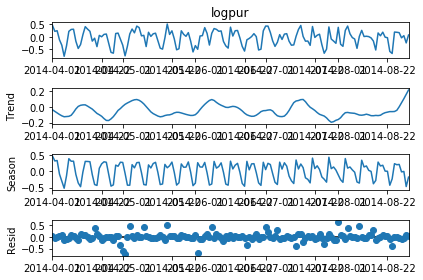

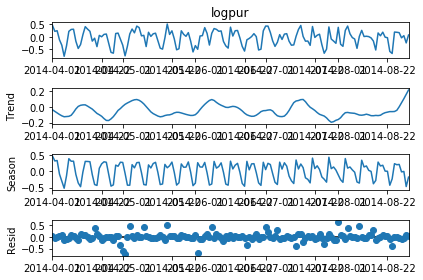

In [150]:
model.plot()

In [61]:
result2 = pd.read_csv('../tc_comp_predict_table5.csv')

In [58]:
result2['purchase'] = (result2['purchase'],result['purchase'])
result2['redeem'] = (result2['redeem']+result['redeem'])//2

In [60]:
result2.to_csv('result_money.csv',index=False)

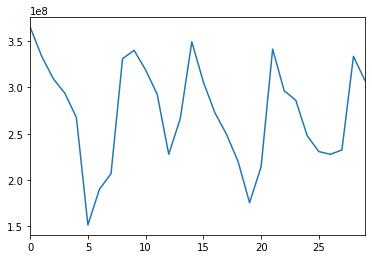

In [63]:
result2['purchase'].plot()

In [138]:
total = pd.read_csv('total_moneys.csv')
total['report_date'] = pd.to_datetime(total['report_date'],format='%Y-%m-%d')
total.set_index('report_date', inplace=True)

In [139]:
purchase = total['total_purchase_amt']/total['user_num']

In [140]:
redeem = total['total_redeem_amt']/total['user_num']

In [155]:
model = sm.tsa.STL(np.log(purchase.loc['2014-04':]),
                   trend=13,robust=True).fit()

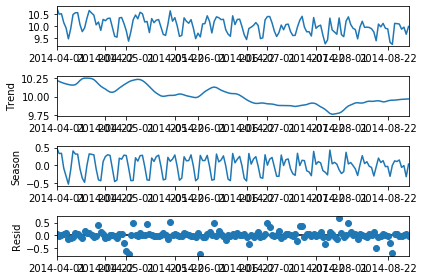

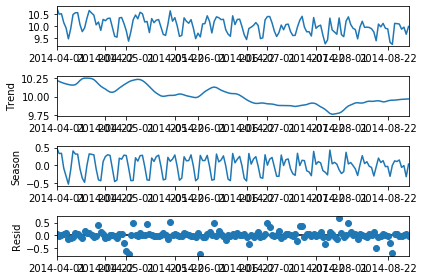

In [156]:
model.plot()